<a href="https://colab.research.google.com/github/Shrutiba/iisc_cds/blob/main/M1_AST_01_Probability_Basics_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 1: Probability basics

## Learning Objectives

At the end of the experiment, you will be able to

* understand the terms like experiment, outcome, sample space and event, as related to probability
* check if the events are mutually exclusive events
* understand the difference between dependent and independent events
* understand the concepts of discrete and continuous random variables and distributions associated with them like PMF, PDF and joint distributions

### Dataset

The dataset chosen for this assignment is [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees). The dataset is made up of 1197 records and 15 columns. It includes important attributes of the garment manufacturing process and the productivity of the employees. Some of the features are listed below
- date : date
- day : day of the Week
- quarter : a portion of the month. A month was divided into four or five quarters
- department : associated department with the instance
- team : associated team number with the instance

Here, we will be using four features which are *department*, *day* of week, *quarter* of month and *team* number to cover the learning objectives and see how selection from one feature affects the selection from other feature. Also we will check their dependency when they are occurring simultaneously as well as one after the other.

To know more about other features of the dataset click [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees).

## Information

**Why do we need probability for Data Science?**

Learning probability helps in making informed decisions about likelihood of events, based on a pattern of collected data. In the context of data science, statistical inferences are often used to analyze or predict trends from data and these inferences use probability distributions of data. Using probability, we can model elements of uncertainty such as risk in financial transactions and many other business processes such as risk evaluation, sales forecasting, market research etc.

**Terminology**

The basic terms related to probability are as follows:

- **Experiment:** an action where the result is uncertain even though all the possible outcomes related to it are known in advance.
- **Outcome:**  a possible result of an experiment or trial.
- **Sample space:** the set of all possible outcomes associated with a random experiment.
- **Event:** a subset of sample space or the single result of an experiment.
- **Mutually exclusive events:** two events are mutually exclusive if the probability of occurrence of both events simultaneously is zero.
- **Dependent events:** two events are dependent if the occurrence of the first affects the occurrence of the second, so the probability is changed.
- **Independent events:** two events are independent if occurring or non-occurring of one does not affect the occurring or non-occurring of a second.
- **Random variable:** a numerical quantity that is generated by a random experiment.
- **Discrete random variable:** a random variable having either a finite or a countable number of possible values.
- **Continuous random variable:**  a random variable having a whole interval of numbers of possible values.
- **Probability mass function:** a probability function associated with a discrete random variable.
- **Probability density function:** a probability function associated with a continuous random variable.
- **Joint distributions:** the joint probability distribution for X, Y,.. is a probability distribution that gives the probability that each of X, Y,.. falls in any particular range or discrete set of values specified for that variable.

### Setup Steps:

In [46]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2417774" #@param {type:"string"}

In [47]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9886610342" #@param {type:"string"}

In [48]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_01_Probability_Basics_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/garments_worker_productivity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [49]:
import numpy as np
import pandas as pd
import scipy                        # scientific computation library
import matplotlib.pyplot as plt     # Visualization
import seaborn as sns               # Advaced Visualization with high level interface
from scipy import integrate         # several integration techniques
sns.set_style('whitegrid')

#### Loading the data

In [50]:
df_ = pd.read_csv('garments_worker_productivity.csv')

#### Explore and preprocess dataset

In [51]:
df_.head(n=3)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


In [52]:
df_.sample(n=10)
df_.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [15]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [16]:
df_.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [53]:
# Consider only five features from dataset
df = df_[['date', 'quarter', 'department', 'day', 'team']]
# Consider records where 'day' is Monday, Thursday or Saturday
df_day = df[df['day'].isin(['Monday', 'Thursday', 'Saturday'])]

# Consider records where 'team' number is 1, 2 or 3
df_day_team = df_day[df_day['team'].isin([1, 2, 3])]
# Consider records where 'quarter' is 'Quarter1' or 'Quarter2'
df_day_team_quarter = df_day_team[df_day_team['quarter'].isin(['Quarter1', 'Quarter2'])]

# Reset the index and store dataset to 'df'
df = df_day_team_quarter.reset_index(drop= True)

In [54]:
df.count()

,0
date,85
quarter,85
department,85
day,85
team,85


In [21]:
# Check for unique values in department column
# YOUR CODE HERE
df['department'].unique()

array(['finishing ', 'sweing', 'finishing'], dtype=object)

In [23]:
# Remove extra space from 'finishing ' department column
# YOUR CODE HERE
df['department'] = df['department'].apply(lambda x :x.replace(' ',''))

# Change department from 'sweing' to 'sewing'
# YOUR CODE HERE
for i in range(len(df)):
  if df.loc[i,'department']=='sweing':
    df.loc[i,'department']='sewing'

In [24]:
# Check for unique values in department column
# YOUR CODE HERE
df['department'].unique()

array(['finishing', 'sewing'], dtype=object)

In [25]:
# Display few rows of processed dataset
# YOUR CODE HERE
df.sample()

,date,quarter,department,day,team
57,2/12/2015,Quarter2,finishing,Thursday,2


In [27]:
df.describe()

,team
count,85.000000
mean,1.905882
std,0.810989
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,3.000000


In [26]:
print('Dataset shape before processing: ', df_.shape)
print('Dataset shape after processing: ', df.shape)

Dataset shape before processing:  (1197, 15)
Dataset shape after processing:  (85, 5)


### Experiment

An experiment or trial is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes. An experiment is said to be *random* if it has more than one possible outcome, and *deterministic* if it has only one. For example, selecting a record from the above dataset, tossing a coin, rolling a die, etc are all random experiments.

**Exercise 1:** Select a record from the above given dataset.

In [28]:
i1 = np.random.randint(df.shape[0]-1)    # get any random index
record = df.iloc[i1:i1+1, :]             # extract record for that index
record

,date,quarter,department,day,team
35,2/2/2015,Quarter1,sewing,Monday,1


### Outcome

Each possible outcome of a particular experiment is unique, and different outcomes are mutually exclusive (only one outcome will occur on each trial of the experiment).

For the experiment where a coin is flipped twice, the four possible outcomes that make up the sample space are (H, T), (T, H), (T, T) and (H, H), where "H" represents a "heads", and "T" represents a "tails".

Similarly, in an experiment of selecting a record from a dataset, the outcome will be that record which got selected.

### Sample space

A sample space is usually denoted using set notation, and the possible ordered outcomes are listed as elements in the set. It is common to refer to a sample space by the labels S, Ω, or U (for "universal set"). The elements of a sample space may be numbers, words, letters, or symbols. They can also be finite, countably infinite, or uncountably infinite.

For example, if the experiment is tossing a coin, the sample space is typically the set {head, tail}, commonly written {H, T}. For tossing two coins, the corresponding sample space would be {HH, HT, TH, TT}.
Similarly, for a random experiment of selecting a record from a dataset, all the rows become it's sample space.

**Exercise 2:** Calculate the length of sample space for a random experiment of selecting a record from the above given dataset.

In [30]:
# YOUR CODE HERE to get length of dataframe index
len(df.index)

85

### Event

An event is a set of outcomes of an experiment to which a probability is assigned. A single outcome may be an element of many different events, and different events in an experiment are usually not equally likely, since they may include very different groups of outcomes. For example, getting an even number after rolling a die once, getting atleast one head after tossing a coin twice, etc.

**Exercise 3:** Getting a *finishing* department record is an event related to the experiment of selecting a record from the whole dataset. Extract a *finishing* department record.

In [31]:
df['department'].unique()

array(['finishing', 'sewing'], dtype=object)

In [32]:
df_finishing = df[df['department']=='finishing']
i2 = np.random.randint(df_finishing.shape[0]-1)
selection = df_finishing.iloc[i2:i2+1, :]
selection

,date,quarter,department,day,team
44,2/7/2015,Quarter1,finishing,Saturday,2


### Probability of an event

The probability of an event is a number between 0 and 1, where, roughly speaking, 0 indicates the impossibility of the event and 1 indicates certainty. The probability formula gives the possibility of an event to happen and is given as

### $Probability\ of\ an\ event\ occurring = \frac{favorable\ outcomes}{total\ outcomes}$

### Mutually exclusive events

Two events $A$ and $B$ are known as mutually exclusive if the probability of occurrence of both the events simultaneously is zero, i.e. $ P(A∩B) = 0 $.

To know more about mutually exclusive events click [here](https://www.mathsisfun.com/data/probability-events-mutually-exclusive.html) .

**Exercise 4:** Show that selecting a *finishing* department record and selecting a *sewing* department record are two mutually exclusive events.

In [33]:
# Select records where department is 'finishing' as well as 'sewing' simultaneously
finishing_and_sewing = np.logical_and(df['department']=='finishing', df['department']=='sewing')
finishing_and_sewing.value_counts()

,count
department,
False,85


Seen from above there are no records where the department is *finishing* as well as *sewing* simultaneously.

**Note:** The *True* values are treated as 1 and *False* values are treated as 0. For example, *True+True = 2*.

In [34]:
# Probability of selecting finishing and sewing department records simultaneously
P = finishing_and_sewing.sum()/len(df)
print('P(selecting finishing and sewing department records simultaneously)= ', P)

P(selecting finishing and sewing department records simultaneously)=  0.0


Seen that occurrence of both the events simultaneously is zero hence the above mentioned two events are mutually exclusive.

Now, let's see the probability of selecting a *finishing* department record first and then a *sewing* department record.

### Dependent events

Two events are called dependent, if the outcomes of the first affects the outcomes of the second, so that the probability is changed.

To know more about dependent events click [here](https://corporatefinanceinstitute.com/resources/knowledge/other/dependent-events-vs-independent-events/#:~:text=Dependent%20events%20influence%20the%20probability,probability%20of%20another%20event%20happening.).

**Exercise 5:** A record is selected at random from the dataset. **Without replacing it, a second record is selected**. Show that getting a *finishing* department record in the first selection and getting a *sewing* department record in the second selection are dependent events.

**Hint:** Take two cases, one for getting the *finishing* department and another for not getting the *finishing* department in the first selection then check if probability for the second selection changes.

*Case 1:* Getting *finishing* department record in first selection and *sewing* department record in the second selection

In [40]:
# count of finishing department records
finishing = df['department']=='finishing'
# YOUR CODE HERE to count the different values in finishing
finishing.value_counts()

,count
department,
False,47
True,38


In [36]:
print(finishing)

0      True
1      True
2     False
3     False
4     False
      ...  
80    False
81     True
82     True
83    False
84     True
Name: department, Length: 85, dtype: bool


In [37]:
df_finishing = df[finishing]
# Probability of selecting finishing department record first = count of finishing department records / all records count
P_finishing_first = len(df_finishing) / len(df)    # 38 / 85 = 0.4471
print('P(selecting a finishing department record first)= ', round(P_finishing_first,4))

P(selecting a finishing department record first)=  0.4471


In [38]:
print(df_finishing)

         date   quarter department       day  team
0    1/1/2015  Quarter1  finishing  Thursday     1
1    1/1/2015  Quarter1  finishing  Thursday     2
5    1/3/2015  Quarter1  finishing  Saturday     3
6    1/3/2015  Quarter1  finishing  Saturday     1
9    1/3/2015  Quarter1  finishing  Saturday     2
11   1/5/2015  Quarter1  finishing    Monday     1
12   1/5/2015  Quarter1  finishing    Monday     3
13   1/5/2015  Quarter1  finishing    Monday     2
17   1/8/2015  Quarter2  finishing  Thursday     1
19   1/8/2015  Quarter2  finishing  Thursday     2
22   1/8/2015  Quarter2  finishing  Thursday     3
23  1/10/2015  Quarter2  finishing  Saturday     1
24  1/10/2015  Quarter2  finishing  Saturday     3
25  1/10/2015  Quarter2  finishing  Saturday     2
29  1/12/2015  Quarter2  finishing    Monday     1
30  1/12/2015  Quarter2  finishing    Monday     3
31  1/12/2015  Quarter2  finishing    Monday     2
38   2/2/2015  Quarter1  finishing    Monday     1
41   2/5/2015  Quarter1  finish

In [41]:
# Randomly selecting any 'finishing' department record
i = np.random.randint(len(df_finishing)-1)             # -1 is to start the index numbering at 0 instead of 1
selection = df_finishing.iloc[i:i+1, :]                # obtaining a single record with index i
selection

,date,quarter,department,day,team
41,2/5/2015,Quarter1,finishing,Thursday,2


In [42]:
# As one record is already selected, the total records available becomes one less than total records
df_new = df.drop(selection.index)

In [46]:
# count of sewing department records
sewing = df_new['department']=='sewing'
# YOUR CODE HERE to count the different values in sewing
sewing.value_counts()

,count
department,
True,47
False,37


In [47]:
df_sewing = df_new[sewing]
# Probability of selecting sewing department record second = count of sewing department records / (all records count - 1) = 47 / 84 = 0.5595.
P_sewing_second_given_finishing_first = len(df_sewing) / len(df_new)
print('P(selecting a sewing department record given finishing department record was selected first)= ', round(P_sewing_second_given_finishing_first,4))

P(selecting a sewing department record given finishing department record was selected first)=  0.5595


Note: In case that the first record was replaced before selecting the second record from the sewing department, the probability for the second selection would remain as 47/85, not affecting the original probability of selecting a sewing department record (indicating Independent events)

In [ ]:
P_finishing_sewing = P_finishing_first * P_sewing_second_given_finishing_first
print('P(finishing record first and sewing record second)= ', round(P_finishing_sewing,4))

*Case 2:* Getting non-*finishing* department record in first selection and *sewing* department record in the second selection

In [ ]:
# count of non-finishing department records
non_finishing = df['department']!='finishing'
non_finishing.value_counts()

In [ ]:
df_non_finishing = df[non_finishing]
# Probability of selecting non-finishing department record first = count of non-finishing department records / all records count
P_non_finishing_first = len(df_non_finishing) / len(df)           # 47 / 85 = 0.5529
print('P(selecting a non-finishing department record first)= ', round(P_non_finishing_first,4))

In [ ]:
# Randomly selecting any non-'finishing' department record
i = np.random.randint(len(df_non_finishing)-1)
selection = df_non_finishing.iloc[i:i+1, :]
selection

In [ ]:
# As one record is already selected, the records available becomes one less than total records
# YOUR CODE HERE to drop record

In [ ]:
# count of sewing department records
sewing = df_new['department']=='sewing'
sewing.value_counts()

In [ ]:
# YOUR CODE HERE to create df_sewing

# Probability of selecting sewing department record second = count of sewing department records / (all records count - 1) = 46 / 84 = 0.5476
# YOUR CODE HERE to create P_sewing_second_given_non_finishing_first

print('P(selecting a sewing department record given non-finishing department record was selected first)= ', round(P_sewing_second_given_non_finishing_first,4))

In [ ]:
# YOUR CODE HERE for P_non_finishing_sewing

In [ ]:
# Check for dependency
P_finishing_sewing != P_non_finishing_sewing

As we see, selecting the second record without replacing the first record in the dataset changed the probability of the selection of the second record. This indicates that these are dependent events.

Till now the selections were made from a common dataset. Let's see what will happen if it is to be made from different subsets of the dataset.

### Independent events

Two events $A$ and $B$ are called independent, if the happening of $A$ does not affect the happening of $B$. Also, for independent events,

$ P(A∩B) = P(A).P(B) $ will hold true

To know more about independent events click [here](https://corporatefinanceinstitute.com/resources/knowledge/other/dependent-events-vs-independent-events/#:~:text=Dependent%20events%20influence%20the%20probability,probability%20of%20another%20event%20happening.).

**Exercise 6:** A record is selected among those whose day of week is *Monday* and also another record is selected among those whose day of week is *Saturday*. Find the probability of getting a *finishing* department record from the first selection and a *sewing* department record from the second selection given both events are independent of each other?

In [48]:
# Display different department and day of week
print('Department: ',df['department'].unique())
# YOUR CODE HERE to display unique weekdays

Department:  ['finishing' 'sewing']


In [49]:
# Select records having day = 'Monday'
df_monday = df[df['day']=='Monday']

P_finishing_from_monday = len(df_monday[df_monday['department']=='finishing']) / len(df_monday)
print('P(selecting finishing department record from Monday records)= ', round(P_finishing_from_monday,4))

P(selecting finishing department record from Monday records)=  0.4688


In [51]:
# Select records having day = 'Saturday'
# YOUR CODE HERE to create df_saturday
df_saturday = df[df['day']=='Saturday']
P_sewing_from_saturday = len(df_saturday[df_saturday['department']=='sewing']) / len(df_saturday)
print('P(selecting sewing department record from Saturday records)= ', round(P_sewing_from_saturday,4))

P(selecting sewing department record from Saturday records)=  0.5769


In [52]:
# As events are independent,
P_finishing_and_sewing = P_finishing_from_monday * P_sewing_from_saturday
print('P(getting finishing department from first selection and sewing department from second selection)= ', round(P_finishing_and_sewing,4))

P(getting finishing department from first selection and sewing department from second selection)=  0.2704


Earlier we saw that the elements of a sample space can be numbers, words, letters, or symbols. Let's see how we can map them to set of real numbers.

### Random Variables

Random variable is basically a function which maps from the set of sample space to set of real numbers. The purpose is to get an idea about result of a particular situation where we are given probabilities of different outcomes.

   Formal definition :   $ X: S -> R $

where,  $X$ = random variable, $S$ = set of sample space, $R$ = set of real numbers
   
To know more about random variables click [here](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm).
   
There are mainly two types of random variables: discrete and continuous as shown in figure below

![image](https://cdn.iisc.talentsprint.com/CDS/Images/Random_variables.jpg)

#### Discrete Random Variable and PMF

A random variable $X$ is said to be discrete if it takes on finite number of values. The probability function associated with it is said to be probability mass function or PMF.
$P(x_i)$ = Probability that $(X = x_i)$ = PMF of $X = p_i$.

* $ 0 ≤ p_i ≤ 1 $
* $ ∑p_i = 1 $ where the sum is taken over all possible values of X

**Exercise 7:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the probability at $X=0$.

In [53]:
df1 = pd.DataFrame({'X=0': '?', 'X=1':0.2, 'X=3': 0.3, 'X=4': 0.1}, index= ['P(X=xi)'])
df1

,X=0,X=1,X=3,X=4
P(X=xi),?,0.2,0.3,0.1


In [56]:
# For a discrete random variable we know that sum of all P(X=xi) = 1,
# YOUR CODE HERE to calculate df1['X=0']
df1['X=0'] = 1 - ( df1['X=1']+df1['X=3']+ df1['X=4'] )
df1

,X=0,X=1,X=3,X=4
P(X=xi),0.4,0.2,0.3,0.1


**Exercise 8:** Plot the PMF of the discrete random variable X defined as total number of heads while tossing a coin thrice.

In [1]:
# Our sample space would consist of {HHH, HHT,HTH, THH, TTH, THT, HTT, TTT}
X = [0, 1, 2, 3]   # Number of heads we can get are

P_X0 = 1/8   # P(X=0)     {TTT}
P_X1 = 3/8   # P(X=1)     {HTT, THT, TTH}
# YOUR CODE HERE to create P_X2     # P(X=2)     {HHT, HTH, THH}
P_X2 = 3/8
# YOUR CODE HERE to create P_X3     # P(X=3)     {HHH}
P_X3 = 1/8
P_Xi = [P_X0, P_X1, P_X2, P_X3]

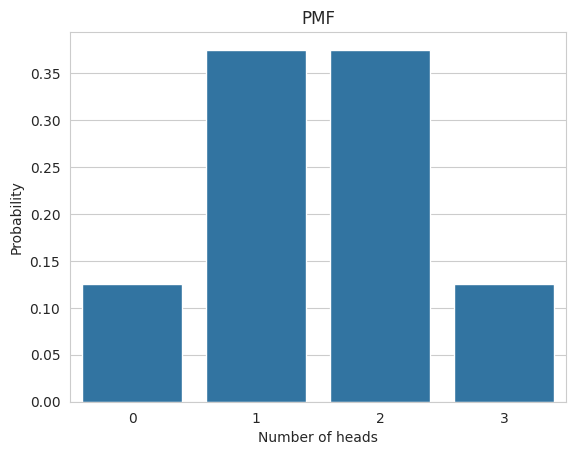

In [4]:
# Plotting PMF
sns.barplot(x= X, y= P_Xi)
plt.title('PMF'); plt.xlabel('Number of heads'); plt.ylabel('Probability')
plt.show()

Text(0, 0.5, 'Cumulative Probability')

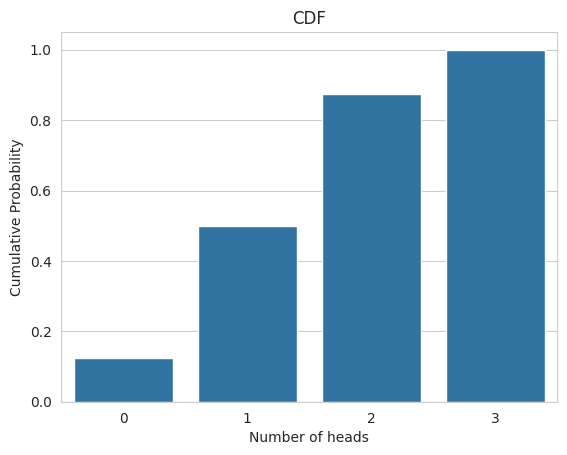

In [6]:
from itertools import accumulate as acc
# Plotting CDF or cumulative distribution function
# YOUR CODE HERE to plot cdf
P_cumulate = list(acc(P_Xi))
sns.barplot(x= X, y= P_cumulate)
plt.title('CDF'); plt.xlabel('Number of heads'); plt.ylabel('Cumulative Probability')

From above plot it can be seen that $ ∑p_i = 1 $.

#### Continuous Random Variable and PDF

A random variable $X$ is said to be continuous if it takes on the infinite number of values. The probability function associated with it is said to be PDF or probability density function.

PDF: If $X$ is a continuous random variable.

$ P (x < X < x + dx) = f(x).dx $

* $ 0 ≤ f(x); $ for all $x$
* $ ∫ f(x) dx = 1  $ over all values of $x$

Then $P (X)$ is said to be a PDF of the distribution.

The probability distribution of a continuous random variable $X$ is an assignment of probabilities to intervals of decimal numbers using a function $f(x)$, called a density function, in the following way: the probability that $X$ assumes a value in the interval $(a,b)$ is equal to the area of the region that is bounded above by the graph of the equation $y=f(x)$, bounded below by the $x$-axis, and bounded on the left and right by the vertical lines through $a$ and $b$, as shown in the figure below
![image](https://cdn.iisc.talentsprint.com/CDS/Images/prob_density_function.png)

**Exercise 9:** Compute the value of $P (1 < X < 2)$.
    Such that the density function is given by,
    
$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &k.x^3&  for\ \  0 ≤ x ≤ 3\\
    &0&   \  otherwise\\
  \end{aligned}
  \right.
\end{equation}
$$
     
Also, plot the PDF and CDF for random variable $X$.

In [7]:
# ∫ f(x) dx = 1
# Using the above property we find k,
# ∫ (k*x**3)dx = 1
# k = 1 / ∫ (x**3)dx
k = 1 / (integrate.quad(lambda x: x**3, 0, 3)[0])        # integrate  x^3  w.r.t  x from 0 to 3
print('k= ', round(k,4))

k=  0.0494


In [9]:
# Now the probability density for 1<X<2 is given by,
# ∫ 1->2 (k*x**3)dx =
# YOUR CODE HERE to calculate P
P = integrate.quad(lambda x: k*x**3, 1, 2)[0]
print(integrate.quad(lambda x: k*x**3, 1, 2))
print('P(1<X<2)= ', round(P, 4))

(0.18518518518518523, 2.0559685641206607e-15)
P(1<X<2)=  0.1852


In [10]:
# Create 100 values within 0 to 3 in order to plot PDF and CDF
x = np.linspace(0,3,100)
df2 = pd.DataFrame({'X':[], 'PDF':[], 'CDF':[]})
df2['X'] = x
df2['PDF'] = df2['X'].apply(lambda v: k*v**3)
df2['CDF'] = df2['X'].apply(lambda v: integrate.quad(lambda u: k*u**3, 0, v)[0])
# YOUR CODE HERE to display first five rows of df2
df2.head(5)

,X,PDF,CDF
0,0.000000,0.000000,0.000000e+00
1,0.030303,0.000001,1.041020e-08
2,0.060606,0.000011,1.665633e-07
3,0.090909,0.000037,8.432265e-07
4,0.121212,0.000088,2.665012e-06


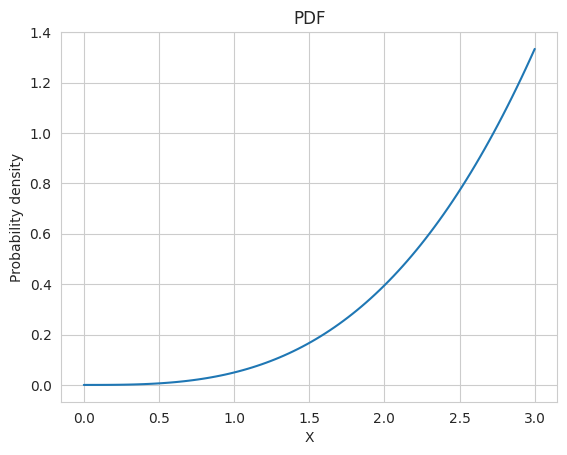

In [11]:
# Plotting PDF
sns.lineplot(x= 'X', y= 'PDF', data= df2)
plt.title('PDF'); plt.xlabel('X'); plt.ylabel('Probability density')
plt.show()

CDF: 0     0.000000e+00
1     1.041020e-08
2     1.665633e-07
3     8.432265e-07
4     2.665012e-06
          ...     
95    8.479176e-01
96    8.841871e-01
97    9.216078e-01
98    9.602040e-01
99    1.000000e+00
Name: CDF, Length: 100, dtype: float64


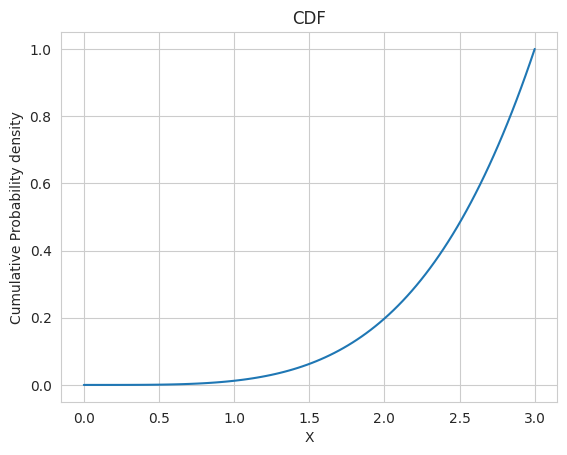

In [20]:
# Plotting CDF
# YOUR CODE HERE to plot cdf
sns.lineplot(x= 'X', y= 'CDF', data= df2)
plt.title('CDF'); plt.xlabel('X'); plt.ylabel('Cumulative Probability density')
print("CDF:", df2['CDF'])
plt.show()

From above plot it can be seen that $ ∫f(x) dx = 1  $.

### **Approach without using 'integrate'**

The approach without 'scipy integrate' basically involves Riemann Sum. To know more about this, you can go through the [Riemann Sum](https://rikyperdana.medium.com/riemann-sum-calculus-with-functional-js-22ea7b8ea256)

In [13]:
# Defining the density function (given as per the question)
def f(x):
    if 0 <= x <= 3:
        return x**3
    else:
        return 0

# Numerically computing the integral to find k
def compute_k():
    k_approx = 0
    dx = 0.001  # Small interval for numerical integration
    x_values = np.arange(0, 3, dx)
    for x in x_values:
        k_approx += f(x) * dx
    return 1 / k_approx

# Computing k
k = compute_k()
print("Value of k:", k)

# Computing the probability P(1 < X < 2)
P_1_to_2 = 0
dx = 0.001  # Small interval for numerical integration
x_values = np.arange(1, 2, dx)
for x in x_values:
    P_1_to_2 += k*f(x) * dx

print("Probability P(1 < X < 2):", P_1_to_2)

Value of k: 0.04941565432830661
Probability P(1 < X < 2): 0.18513578600271835


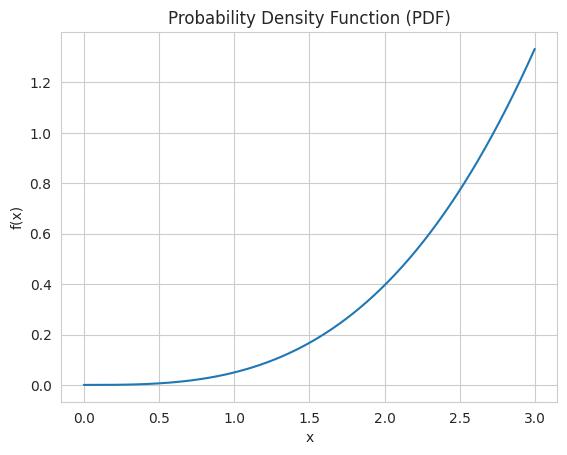

In [33]:
# Plotting the PDF
import matplotlib.pyplot as plt
import numpy as np

dx = 0.001
x_values = np.arange(0, 3, dx)
y_values = [k*f(x) for x in x_values]
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Probability Density Function (PDF)")
plt.grid(True)
plt.show()

In [34]:
# Computing the CDF
cdf_values = []
cumulative_prob = 0
for x in x_values:
    cumulative_prob += k*f(x)*dx
    cdf_values.append(cumulative_prob)
print("CDF:", cdf_values)

CDF: [0.0, 4.941565432830661e-14, 4.4474088895475946e-13, 1.7789635558190378e-12, 4.941565432830661e-12, 1.1118522223868987e-11, 2.1792303558783214e-11, 3.874187299339238e-11, 6.404268800948536e-11, 1.000667000148209e-10, 1.494823543431275e-10, 2.1525459025410358e-10, 3.006448409334174e-10, 4.092110334927071e-10, 5.448075889695804e-10, 7.115854223276152e-10, 9.139919424563591e-10, 1.1567710521713295e-09, 1.4449631482140138e-09, 1.7839051212518689e-09, 2.1792303558783216e-09, 2.6368687306127693e-09, 3.163046617900578e-09, 3.764286884113084e-09, 4.447408889547595e-09, 5.219528488427386e-09, 6.088058028901703e-09, 7.060706353045762e-09, 8.145478796860749e-09, 9.350677190273819e-09, 1.0684899857138097e-08, 1.215704161523268e-08, 1.3776293776262631e-08, 1.5552144145858986e-08, 1.749437702357875e-08, 1.9613073202904895e-08, 2.191860997124637e-08, 2.4421661109938083e-08, 2.7133196894240924e-08, 3.0064484093341746e-08, 3.322708597035337e-08, 3.663286228231459e-08, 4.029396928019017e-08, 4.4222

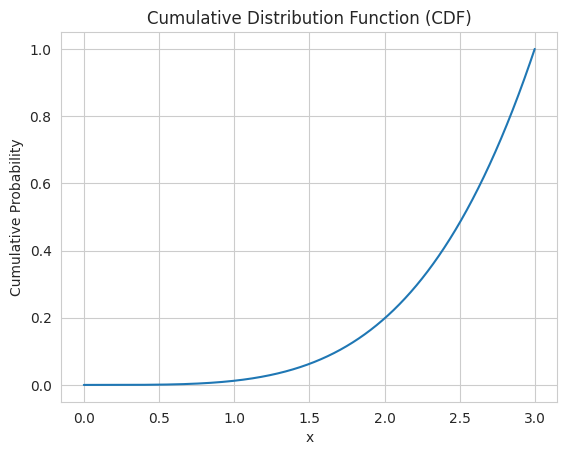

In [35]:
# Plotting the CDF
plt.plot(x_values, cdf_values)
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

Let's see how the relationship vary when two or more random variables are defined on a probability space together.

### Joint Distributions (Optional)

Given random variables $X,Y,...,$ that are defined on a probability space, the joint probability distribution for $X,Y,...,$ is a probability distribution that gives the probability that each of $X,Y,...,$ falls in any particular range or discrete set of values specified for that variable. In the case of only two random variables, this is called a bivariate distribution, but the concept generalizes to any number of random variables, giving a multivariate distribution.

The joint probability distribution can be expressed either in terms of a joint cumulative distribution function or in terms of a joint PDF (in the case of continuous variables) or joint PMF (in the case of discrete variables).

To know more about joint distributions click [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module1/Marg_Joint_Conditional_Probabilities.pdf).

#### Joint PMF

**Exercise 10:** Consider the probability experiment where a fair coin is tossed three times and the sequence of heads and tails are recorded. Let random variable $X$ denote the number of heads obtained and random variable $Y$ denote the winnings earned in a single play of a game with the following rules, based on the outcomes of the probability experiment:
* a player wins 1 point if first head occurs on the first toss
* a player wins 2 points if first head occurs on the second toss
* a player wins 3 points if first head occurs on the third toss
* a player loses 1 point if no head occur

Represent the joint pmf of $X$ and $Y$ in tabular form.

In [36]:
# The possible values of X and Y are
x= [0,1,2,3]
y= [-1, 1, 2, 3]

# Represent joint pmf using table
df3 = pd.DataFrame(columns= ['X=0', 'X=1', 'X=2', 'X=3'], index= ['Y=-1', 'Y=1', 'Y=2', 'Y=3'])
df3

,X=0,X=1,X=2,X=3
Y=-1,NaN,NaN,NaN,NaN
Y=1,NaN,NaN,NaN,NaN
Y=2,NaN,NaN,NaN,NaN
Y=3,NaN,NaN,NaN,NaN


In [38]:
# Possible values : {HHH, HHT,HTH, THH, TTH, THT, HTT, TTT}

df3.iloc[0,0] = 1/8    # P(X=0, Y=-1)  Cases when no heads has occur {TTT}
# YOUR CODE HERE for   # P(X=1, Y=1)  Cases when first head occurs at first toss and number of heads occur is one {HTT}
df3.iloc[1,1] = 1/8
# YOUR CODE HERE for   # P(X=2, Y=1)  Cases when first head occurs at first toss and number of heads occur is two {HTH, HHT}
df3.iloc[2,0] = 2/8
# YOUR CODE HERE for   # P(X=3, Y=1)  Cases when first head occurs at first toss and number of heads occur is three {HHH}
df3.iloc[3,1] = 1/8
# YOUR CODE HERE for   # P(X=1, Y=2)  Cases when first head occurs at second toss and number of heads occur is one {THT}
df3.iloc[1,2] = 1/8
# YOUR CODE HERE for   # P(X=2, Y=2)  Cases when first head occurs at second toss and number of heads occur is two {THH}
df3.iloc[2,2] = 1/8
# YOUR CODE HERE for   # P(X=1, Y=3)  Cases when first head occurs at third toss and number of heads occur is one {TTH}
df3.iloc[1,3] = 1/8

In [39]:
# For cases like, when first head occurs at first toss and number of heads occur is 0, the values will be 0, as no such outcomes are possible
# YOUR CODE HERE to replace NaN with 0
df3 = df3.fillna(0)

<ipython-input-39-45b0d84bd15f>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3 = df3.fillna(0)


In [40]:
# Cross check the total of Joint PMF should be = 1
# YOUR CODE HERE
sum(sum(df3.values))

1.0

#### Joint PDF

The intuition behind the joint density $f(x,y)$ is similar to that of the PDF of a single random variable.
For small positive $dx$ and $dy$, we can write

$P(x ≤ X ≤ x+dx,\  y ≤ Y ≤ y+dy) = f(x,y).dx.dy $

Also, $ ∫∫ f(x,y)dxdy = 1 $

**Exercise 11:** Let $X$ and $Y$ be two jointly continuous random variables with joint PDF given by

$$f(x,y)=\begin{equation}
\left\{
  \begin{aligned}
    &x + c.y^2&  for\ \  0 ≤ x ≤ 1,\  0 ≤ y ≤ 1\\
    &0&   \ otherwise\\
  \end{aligned}
  \right.
\end{equation}
$$
                 
Find the constant $c$.

In [42]:
# Using ∫∫ f(x,y)dxdy = 1

# ∫∫ (x + c.y**2)dxdy = 1
# ∫∫ x.dxdy + ∫∫ c.y**2.dxdy = 1
# c = (1 - ∫∫ x.dxdy) / ∫∫ y**2.dxdy
c = (1 - integrate.dblquad(lambda y,x: x, 0,1,0,1)[0]) / integrate.dblquad(lambda y,x: y**2, 0,1,0,1)[0]
print('c= ', round(c,1))

c=  1.5


Find $ P(0 ≤ X ≤ 1/2,\ 0 ≤ Y ≤ 1/2) $.

In [ ]:
p = integrate.dblquad(lambda y,x: x + c*y**2, 0, 1/2, 0, 1/2)[0]
print('P(0 ≤ X ≤ 1/2, 0 ≤ Y ≤ 1/2)= ', round(p,4))

In [44]:
# Cross check the total probability should be ≈ 1
# YOUR CODE HERE
p_full = integrate.dblquad(lambda y,x: x + c*y**2, 0, 1,0,1)[0]
print('P(0 ≤ X ≤ 1, 0 ≤ Y ≤ 1)= ', round(p_full,4))

P(0 ≤ X ≤ 1, 0 ≤ Y ≤ 1)=  1.0


#### Refrences:
1. https://medium.com/@asnsamsniloy/difference-between-pdf-and-cdf-3d5427c12c65

### Please answer the questions below to complete the experiment:




In [81]:
# Since A & B are independent P(A∩B) = P(A)*P(B)
dfA = df[df['quarter']=='Quarter1']
dfA_Team = dfA[dfA['team']==1]
P_A = len(dfA_Team) / len(dfA)
dfB = df[df['quarter']=='Quarter2']
dfB_Team = dfB[dfB['team']==2]
P_B = len(dfB_Team) / len(dfB)
P_Joint_Prob = P_A * P_B
print(P_Joint_Prob)

0.13101903695408734


In [79]:
total_Q1_Count = (df['quarter'] == 'Quarter1').sum()
team1_Count = ((df['quarter'] == 'Quarter1') & (df['team'] == 1)).sum()
total_Q2_Count = (df['quarter'] == 'Quarter2').sum()
team2_Count = ((df['quarter'] == 'Quarter2') & (df['team'] == 2)).sum()
print(team1_Count/total_Q1_Count*team2_Count/total_Q2_Count)

0.13101903695408734


In [85]:
total_Q1_Count = (df['quarter'] == 'Quarter1').sum()
total_Q2_Count = (df['quarter'] == 'Quarter2').sum()
counts = df.groupby(['quarter', 'team']).size()
team1_Count = counts.get(('Quarter1',1),0)
team2_Count = counts.get(('Quarter2',2),0)
print(team1_Count/total_Q1_Count*team2_Count/total_Q2_Count)

0.13101903695408734


In [86]:
# @title Based on the productivity prediction of garment employees dataset (df), let A represent the event of getting a team 1 record, given it is selected from Quarter1 records and B represent the event of getting a team 2 record, given it is selected from Quarter2 records. If A and B are independent events, find P(A∩B). { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "0.131" #@param ["","0.383","0.3421", "0.131"]

In [87]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [93]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "More Difficult Exercises" #@param {type:"string"}


In [88]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [89]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [90]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Not Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [94]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 143
Date of submission:  09 Nov 2024
Time of submission:  23:34:14
View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions
